**CRIME RATE PREDICTION USING KNN**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("crime_dataset_india.csv")

In [ ]:
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [ ]:
print(df.columns)

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')


In [ ]:
df

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN


In [ ]:
# Handle missing values (if any) - example: fill missing values with the mean
df = df.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['int64', 'float64'] else col.fillna('Unknown'))


In [ ]:
# Convert categorical features into numeric using label encoding or one-hot encoding
# Example: Encoding 'City' and 'Crime Description'
df['City'] = df['City'].astype('category').cat.codes
df['Crime Description'] = df['Crime Description'].astype('category').cat.codes

In [ ]:
# Select features and target variable
# For this example, let's assume we're predicting 'Crime Code' (you can change this based on your needs)
X = df[['Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'City', 'Victim Age',
        'Victim Gender', 'Weapon Used', 'Crime Domain', 'Police Deployed']]
y = df['Crime Code']

In [ ]:
# Convert date and time features into numerical values (optional)
# Example: Convert 'Date Reported' and 'Date of Occurrence' to datetime and extract features like day, month
df['Date Reported'] = pd.to_datetime(df['Date Reported'], format='%d-%m-%Y %H:%M', errors='coerce')
df['Day Reported'] = df['Date Reported'].dt.day
df['Month Reported'] = df['Date Reported'].dt.month

In [ ]:
df['Date Reported'] = pd.to_datetime(df['Date Reported'], dayfirst=True, errors='coerce')

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert 'Date Reported' and 'Date of Occurrence' to datetime
df['Date Reported'] = pd.to_datetime(df['Date Reported'], format='%d-%m-%Y %H:%M', errors='coerce')
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], format='%d-%m-%Y %H:%M', errors='coerce')

# Extract meaningful numerical features from dates
df['Year Reported'] = df['Date Reported'].dt.year
df['Month Reported'] = df['Date Reported'].dt.month
df['Day Reported'] = df['Date Reported'].dt.day
df['Hour Reported'] = df['Date Reported'].dt.hour

df['Year Occurrence'] = df['Date of Occurrence'].dt.year
df['Month Occurrence'] = df['Date of Occurrence'].dt.month
df['Day Occurrence'] = df['Date of Occurrence'].dt.day
df['Hour Occurrence'] = df['Date of Occurrence'].dt.hour

# Drop original datetime columns
df.drop(columns=['Date Reported', 'Date of Occurrence'], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = ['City', 'Crime Description', 'Victim Gender', 'Weapon Used', 'Crime Domain', 'Case Closed']

# Apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders if needed for inverse transformation later

In [ ]:
# Check for non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index(['Date Reported', 'Date of Occurrence', 'Time of Occurrence',
       'Victim Gender', 'Weapon Used', 'Crime Domain'],
      dtype='object')


In [ ]:
import pandas as pd

# Display column names to check for unexpected spaces
print("Column names in DataFrame:", df.columns.tolist())

# Ensure column names are properly formatted
df.columns = df.columns.str.strip()

# Verify if 'Date Reported' and 'Date of Occurrence' exist
if 'Date Reported' not in df.columns:
    print("⚠️ Warning: 'Date Reported' column is missing in the DataFrame!")
if 'Date of Occurrence' not in df.columns:
    print("⚠️ Warning: 'Date of Occurrence' column is missing in the DataFrame!")

# Convert date columns only if they exist
if 'Date Reported' in df.columns:
    df['Date Reported'] = pd.to_datetime(df['Date Reported'], dayfirst=True, errors='coerce')
if 'Date of Occurrence' in df.columns:
    df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], dayfirst=True, errors='coerce')

# Extract date-related features only if the columns exist
for col in ['Date Reported', 'Date of Occurrence']:
    if col in df.columns:
        df[f'Year {col}'] = df[col].dt.year
        df[f'Month {col}'] = df[col].dt.month
        df[f'Day {col}'] = df[col].dt.day
        df[f'Hour {col}'] = df[col].dt.hour

# Drop the original date columns only if they exist
df.drop(columns=['Date Reported', 'Date of Occurrence'], errors='ignore', inplace=True)

# Display the first few rows to verify changes
print(df.head())


Column names in DataFrame: ['Report Number', 'Time of Occurrence', 'City', 'Crime Code', 'Crime Description', 'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain', 'Police Deployed', 'Case Closed', 'Date Case Closed', 'Day Reported', 'Month Reported', 'Year Reported', 'Hour Reported', 'Year Occurrence', 'Month Occurrence', 'Day Occurrence', 'Hour Occurrence']
⚠️ Warning: 'Date Reported' column is missing in the DataFrame!
⚠️ Warning: 'Date of Occurrence' column is missing in the DataFrame!
   Report Number Time of Occurrence  City  Crime Code  Crime Description  \
0              1   01-01-2020 01:11     1         576                 11   
1              2   01-01-2020 06:26     4         128                 10   
2              3   01-01-2020 14:30    15         271                 13   
3              4   01-01-2020 14:46    21         170                  2   
4              5   01-01-2020 16:51    21         421                 19   

   Victim Age  Victim Gender  Weapon Use

In [ ]:
df = df.apply(lambda col: col.fillna(col.mean()) if col.dtype != 'object' else col.fillna('Unknown'))

In [ ]:
#Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [ ]:
#Split features and target variable
X = df.drop(columns=['Crime Code'])  # Change 'Crime Code' if your target is different
y = df['Crime Code']

In [ ]:
#Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#  Separate the features and target
X = df.drop('Crime Domain', axis=1)    # Features
y = df['Crime Domain']                  # Target labels

#  Ensure only numerical features are scaled
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

#  Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Scale only numerical features
scaler = StandardScaler()

# Apply scaling only to numerical columns
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])




In [ ]:
#Verify the shapes of datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (32128, 55913)
X_test shape: (8032, 55913)
y_train shape: (32128,)
y_test shape: (8032,)


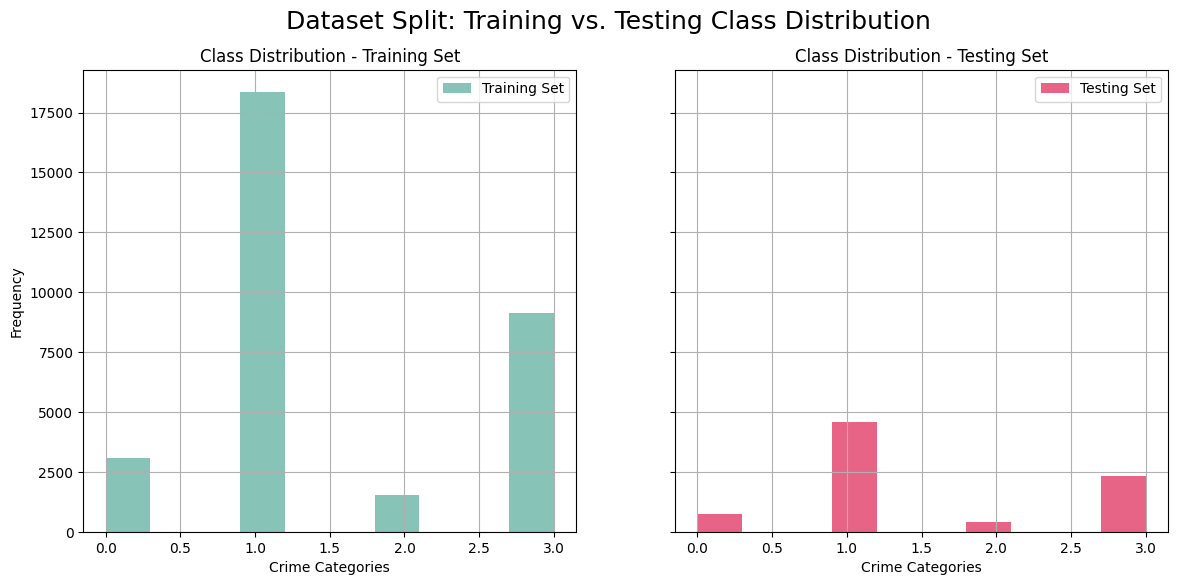

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the distribution of classes in the training and testing sets
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot training set
axes[0].hist(y_train, bins=10, color='#5A9', alpha=0.7, label='Training Set')
axes[0].set_title('Class Distribution - Training Set')
axes[0].set_xlabel('Crime Categories')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)
axes[0].legend()

# Plot testing set
axes[1].hist(y_test, bins=10, color='#D25', alpha=0.7, label='Testing Set')
axes[1].set_title('Class Distribution - Testing Set')
axes[1].set_xlabel('Crime Categories')
axes[1].grid(True)
axes[1].legend()

plt.suptitle('Dataset Split: Training vs. Testing Class Distribution', fontsize=18)
plt.show()


**Visualizing Class Distributions**

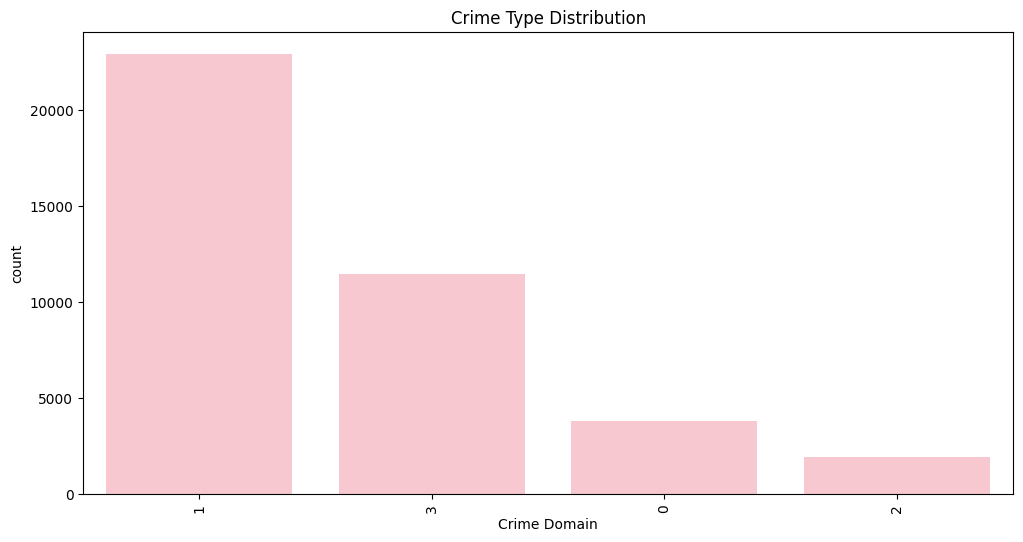

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='Crime Domain', data=df, order=df['Crime Domain'].value_counts().index, color='pink')
plt.xticks(rotation=90)
plt.title('Crime Type Distribution')
plt.show()

**Visualizing Feature Distributions**

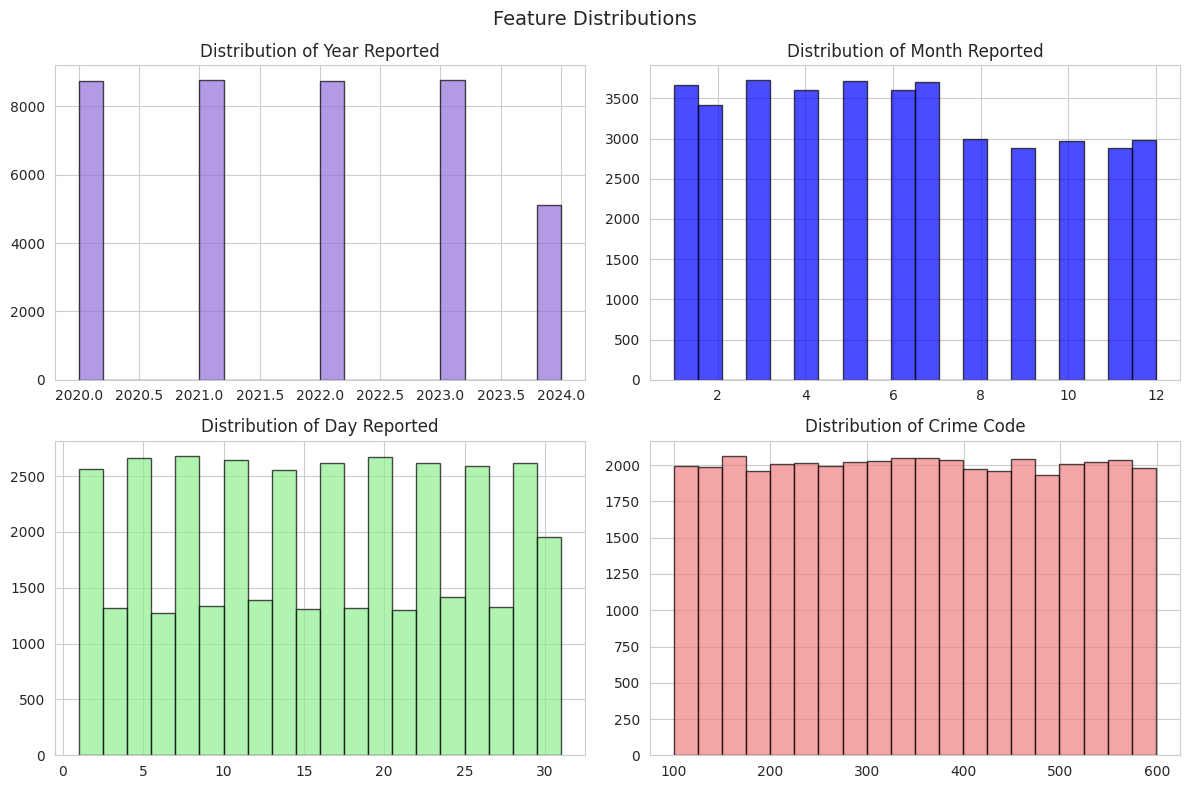

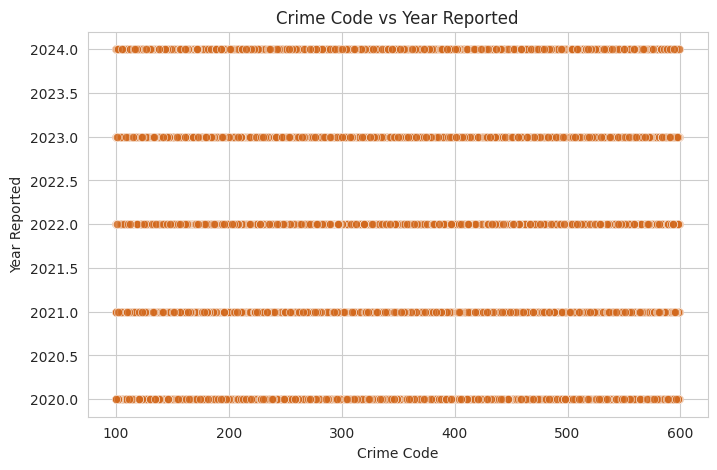

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Define colors for different plots
hist_colors = ['mediumpurple', 'blue', 'lightgreen', 'lightcoral']
scatter_color = 'chocolate'

# Plot histograms for numerical features with different colors
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
features = ['Year Reported', 'Month Reported', 'Day Reported', 'Crime Code']

for i, ax in enumerate(axes.flatten()):
    ax.hist(df[features[i]], bins=20, color=hist_colors[i], edgecolor='black', alpha=0.7)
    ax.set_title(f"Distribution of {features[i]}")

plt.suptitle("Feature Distributions", fontsize=14)
plt.tight_layout()
plt.show()

# Scatter plot for Crime Code vs Year Reported
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Crime Code'], y=df['Year Reported'], color=scatter_color, alpha=0.7)
plt.title("Crime Code vs Year Reported")
plt.show()


**KNN Decision Boundary Visualization**

<ipython-input-27-689e98379164>:45: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=scatter_colors, edgecolor='k')


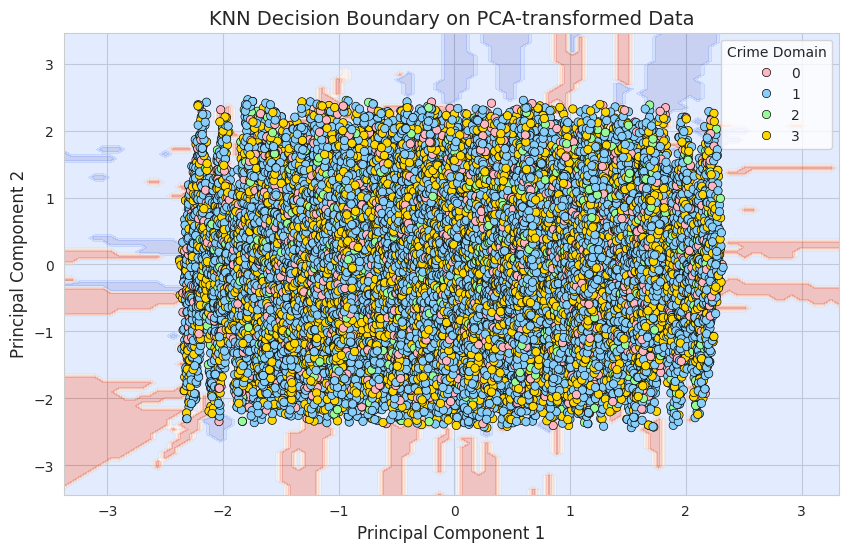

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Select numerical features for PCA
features = ['Year Reported', 'Month Reported', 'Day Reported', 'Hour Reported', 'Crime Code']
X = df[features]
y = df['Crime Domain']  # Assuming this is the target

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, y)

# Generate meshgrid for decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict on grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Set pastel style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # Change colormap

# Scatter plot with pastel colors, replacing lavender with medium purple
scatter_colors = ['#FFB6C1', '#87CEFA', '#98FB98', '#FFD700', '#9370DB']  # Light Pink, Light Blue, Light Green, Gold, Medium Purple
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=scatter_colors, edgecolor='k')

plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('KNN Decision Boundary on PCA-transformed Data', fontsize=14)
plt.show()

**Crime Rates in Different Cities Over the Years**

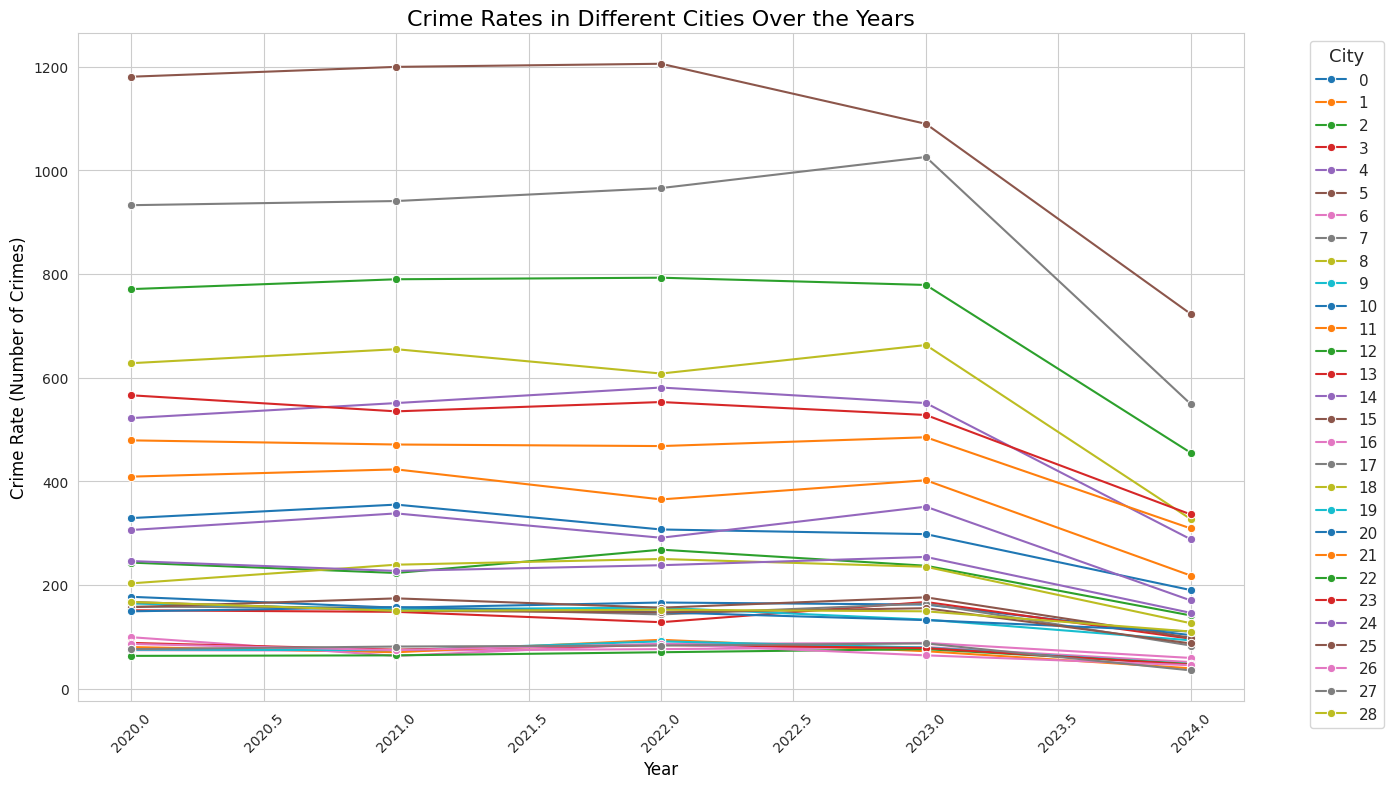

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Year and City, then count the number of crimes per year per city
crime_counts = df.groupby(['Year Reported', 'City']).size().reset_index(name='Crime Count')

# Create a line plot to visualize the trend for each city
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year Reported', y='Crime Count', hue='City', data=crime_counts, marker='o', palette='tab10')

# Title and labels
plt.title('Crime Rates in Different Cities Over the Years', fontsize=16, color='black')
plt.xlabel('Year', fontsize=12, color='black')
plt.ylabel('Crime Rate (Number of Crimes)', fontsize=12, color='black')
plt.xticks(rotation=45)

# Display legend to show which line corresponds to which city
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='13', fontsize='11')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Save KNN model
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

In [ ]:
from google.colab import files
files.download('knn_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>